In [1]:
import sys
sys.path.append("..")
import json
import numpy as np
import random
import os
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.frame import DataFrame
import numpy as np
import csv

In [6]:
target_values = [1, 0, 1, 1, 1, 0.95, 0.99]
count_violations = np.zeros((128),dtype = int)

priority_list = []
with open("priority_list.csv") as csvfile:
    csv_file = csv.reader(csvfile)
    for row in csv_file:
        priority_list.append(row)
    priority_list = [[float(x) for x in row] for row in priority_list]
priority_list = np.array(priority_list)


result_list = []
file_folder_orgin = os.path.abspath(os.path.join(os.getcwd())) + "/2020_12_28_Brute_Froce_results"
# print(file_folder_orgin)
dirs = os.listdir(file_folder_orgin)
# print(dirs)
for file_folder in dirs:
    folder_name = file_folder_orgin + '/' + file_folder
#     print(folder_name)
    fileList = os.listdir(folder_name)
    fileList.sort()
    for i in range(len(fileList)):
        textname = folder_name + '/' + fileList[i]
        result = np.loadtxt(textname)
        violation_pattern = np.zeros((7), dtype = int)
        result_list.append(result)
        for j in range(len(violation_pattern)):
            if result[j] < target_values[j]:
                violation_pattern[j] = 1
            else:
                violation_pattern[j] = 0

        flag = 0
        for j in range (priority_list.shape[0]):
            if (np.array(violation_pattern) == priority_list[j]).all():
                flag = 1
                count_violations[j] += 1
                break
        if flag == 0:
            print(violation_pattern)
            
print(count_violations, count_violations.sum(), np.array(result_list).shape[0])



/Users/luoyixing/Documents/GitHub/2020_12_28_Brute_Froce_results
['2020_12_27_Brute_Froce_results_54', '2020_12_27_Brute_Froce_results_38', '2020_12_28_Brute_Froce_results_70', '2020_12_28_Brute_Froce_results_68', '2020_12_27_Brute_Froce_results_103', '2020_12_27_Brute_Froce_results_0', '2020_12_28_Brute_Froce_results_18', '2020_12_28_Brute_Froce_results_45']
[   0    0    0    0    0    0    1    0    0    7    0    0    0    0
    0    0    0    0    0    0    4    0    0    0    0    0   13    0
    1    3    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    2    3    0    0    0    4    0    0    0
    0    0    4    0    2    1    0    0    0    0    0    1    0  203
   32    0    0 1138    0    0    0    0    0  172  518   31  241    3
 1103  411    3    0    2    1  599   36  327  191   11  264    0    0
    0    0    0  261   26    0    0  248    0    0    3    0    0   40
 1649   12  296 1519 1416  252  105    1    2  769 4308   70  740  608

In [7]:
criticality = 0
for i in range(len(count_violations)):
    criticality += count_violations[i] * (127-i)/127
    
print(criticality/count_violations.sum())

category = 0
for i in range(len(count_violations)):
    if count_violations[i] > 0:
        category += 1

print(category, category/128)

0.13741811023622047
53 0.4140625


In [8]:
sns.set_style("darkgrid")
data_result = DataFrame(result_list)
data_result.rename(columns={0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:'g'},inplace=True)#注意这里0和1都不是字符串
data_result.dropna(axis=0,how='any')

,a,b,c,d,e,f,g
0,1.0,3.974373,1.0,1.000000,1.000000,1.000000,0.998934
1,1.0,3.500353,1.0,1.000000,1.000000,1.000000,0.999546
2,1.0,3.500034,1.0,1.000000,1.000000,1.000000,0.999666
3,1.0,7.028917,1.0,1.000000,1.000000,1.000000,0.998924
4,1.0,4.000018,1.0,0.638651,1.000000,0.958594,0.994353
...,...,...,...,...,...,...,...
19995,1.0,-1.000000,1.0,1.000000,1.000000,0.974076,0.998002
19996,1.0,4.648429,1.0,0.409301,1.000000,0.935350,0.993215
19997,1.0,-1.000000,1.0,1.000000,1.000000,0.962746,0.995058
19998,1.0,-1.000000,1.0,0.346645,1.000000,0.941499,0.991488


/Users/luoyixing/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='a'>

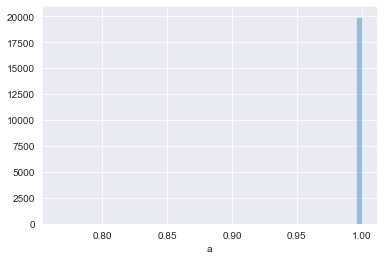

In [9]:
sns.distplot(data_result['a'],kde = False)

<AxesSubplot:xlabel='b'>

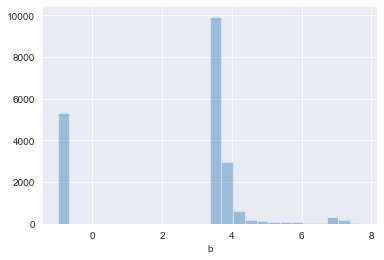

In [10]:
sns.distplot(data_result['b'],kde = False)

<AxesSubplot:xlabel='c'>

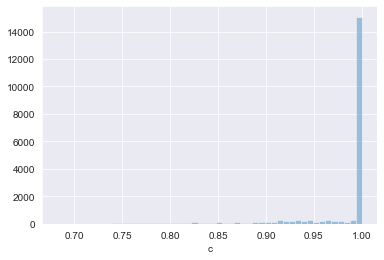

In [11]:
sns.distplot(data_result['c'],kde = False)

<AxesSubplot:xlabel='d'>

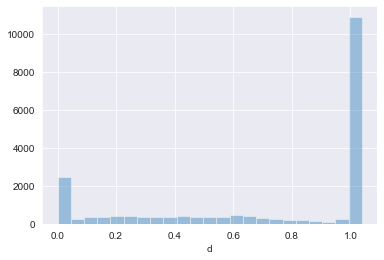

In [12]:
sns.distplot(data_result['d'],kde = False)

<AxesSubplot:xlabel='e'>

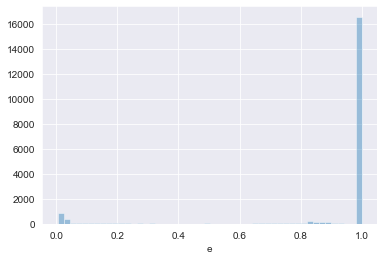

In [13]:
sns.distplot(data_result['e'],kde = False)

<AxesSubplot:xlabel='f'>

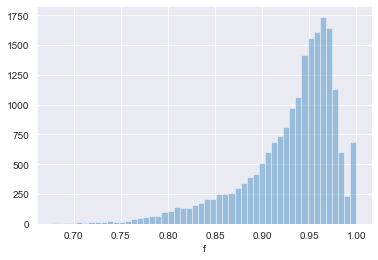

In [14]:
sns.distplot(data_result['f'],kde = False)

<AxesSubplot:xlabel='g'>

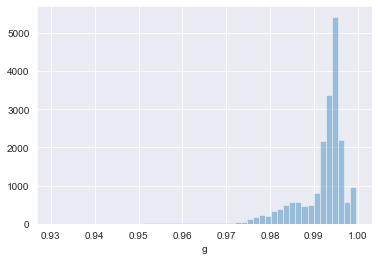

In [15]:
sns.distplot(data_result['g'],kde = False)

          a         b         c         d         e         f         g
a  1.000000  0.045601 -0.015946  0.040058  0.005833 -0.005726 -0.008406
b  0.045601  1.000000 -0.112153  0.177903  0.316306  0.224362  0.178736
c -0.015946 -0.112153  1.000000 -0.347046 -0.057652  0.264918  0.457482
d  0.040058  0.177903 -0.347046  1.000000 -0.011982 -0.205693 -0.276323
e  0.005833  0.316306 -0.057652 -0.011982  1.000000  0.194861  0.214055
f -0.005726  0.224362  0.264918 -0.205693  0.194861  1.000000  0.562147
g -0.008406  0.178736  0.457482 -0.276323  0.214055  0.562147  1.000000


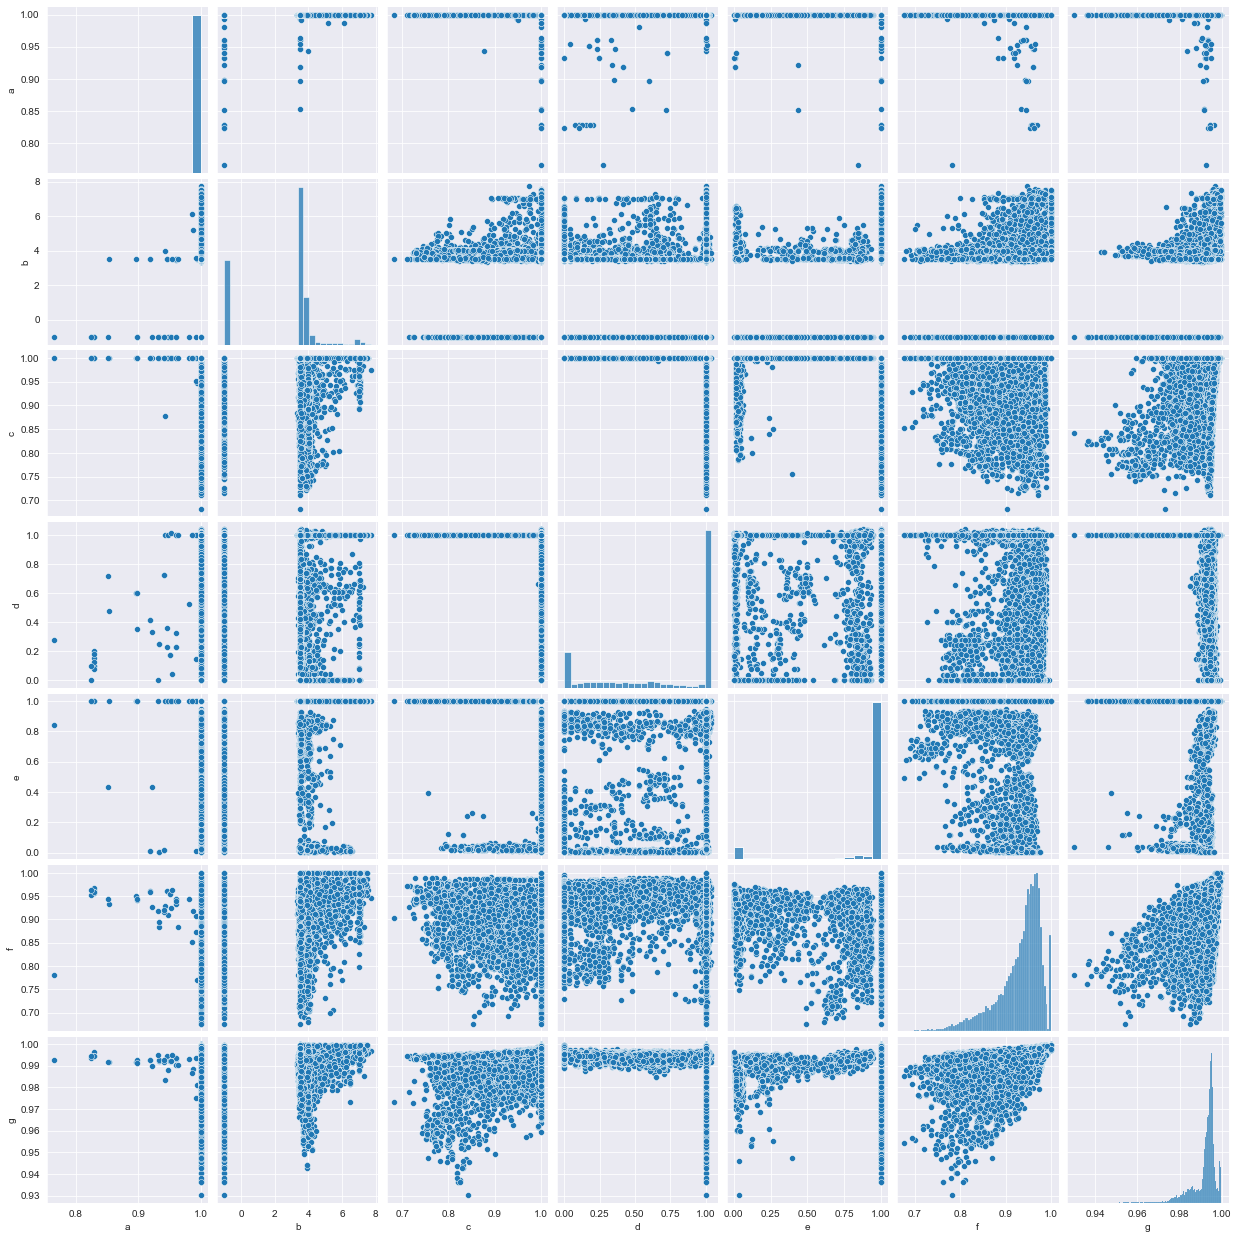

In [16]:
print(data_result.corr())
sns.pairplot(data_result)

<AxesSubplot:>

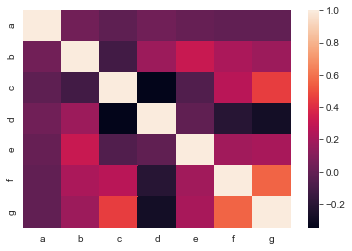

In [17]:
sns.heatmap(data_result.corr())

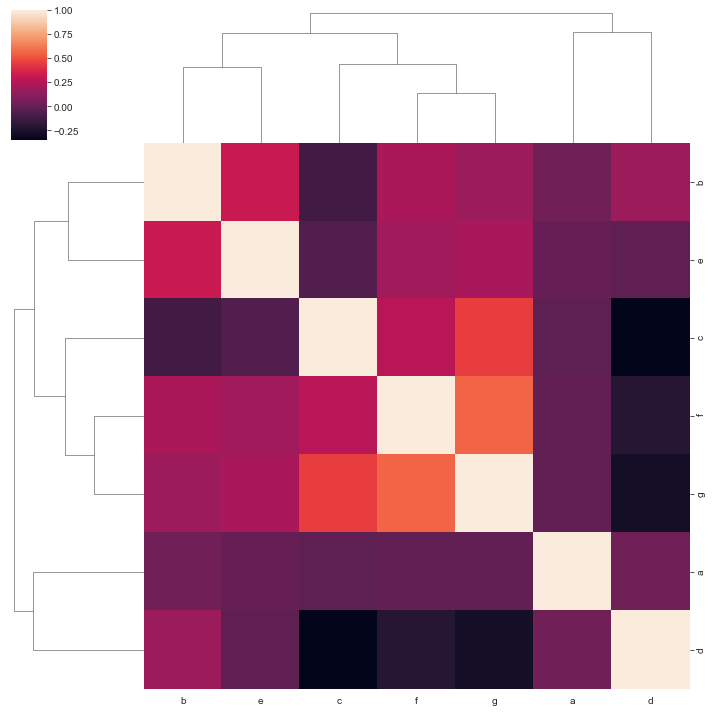

In [18]:
sns.clustermap(data_result.corr())

/Users/luoyixing/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luoyixing/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luoyixing/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

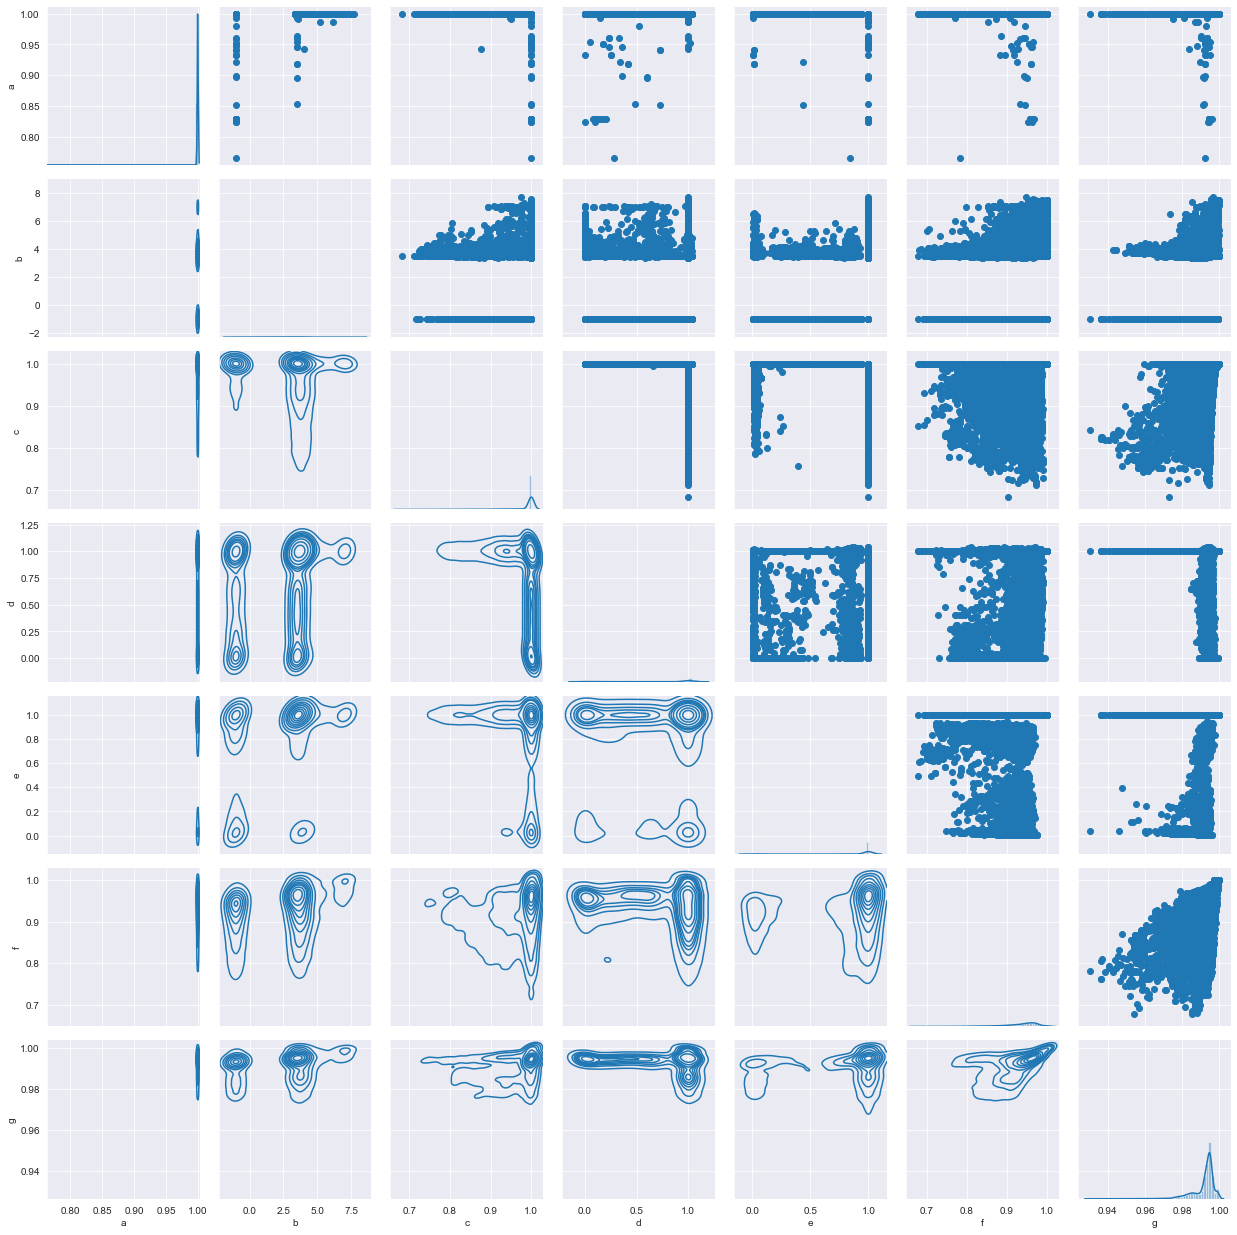

In [19]:
g = sns.PairGrid(data_result)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)